<a href="https://colab.research.google.com/github/arthurantonio/Teste_Analytics_ArthurPereira/blob/main/Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

In [2]:
from google.colab import drive
drive.mount('/content/drive/') # Montar o drive

Mounted at /content/drive/


# **Tratamento do Dados**

In [3]:
caminho = '/content/drive/MyDrive/PS Quod/data.csv'
vendas = pd.read_csv(caminho)
vendas.head()

,Unnamed: 0,ID,Data,Produto,Categoria,Quantidade,Preço
0,0,1,2023-08-14,Camiseta,Marca A,1.0,70.0
1,1,2,2023-06-26,Calça,Marca B,1.0,115.0
2,2,3,2023-08-24,Calça,Marca A,2.0,NaN
3,3,4,2023-08-27,Calça,Marca A,3.0,80.0
4,4,5,2023-07-16,Camiseta,Marca A,1.0,60.0


Excluindo a primeira coluna, denominada "Unnamed: 0"

In [4]:
vendas = vendas.drop(vendas.columns[[0]], axis=1)
vendas.head()

,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-08-14,Camiseta,Marca A,1.0,70.0
1,2,2023-06-26,Calça,Marca B,1.0,115.0
2,3,2023-08-24,Calça,Marca A,2.0,NaN
3,4,2023-08-27,Calça,Marca A,3.0,80.0
4,5,2023-07-16,Camiseta,Marca A,1.0,60.0


Verificando o formato das colunas do data frame

In [5]:
vendas.dtypes

,0
ID,int64
Data,object
Produto,object
Categoria,object
Quantidade,float64
Preço,float64


Data está como "Object", isto é, String. Por isso, decidi transformar para o formato de Date.

In [6]:
vendas['Data']= pd.to_datetime(vendas['Data'])

Verificando se há linhas com "NaN"

In [7]:
vendas.isnull().sum()

,0
ID,0
Data,0
Produto,0
Categoria,0
Quantidade,4
Preço,5


Excluindo linhas duplicadas

In [8]:
vendas = vendas.dropna()

Verificando se tem linhas duplicadas

In [10]:
print(f"Número de Linhas Duplicadas: {vendas.duplicated().sum()}")

Número de Linhas Duplicadas: 0


Salvar novo Data Frame

In [11]:
caminho = '/content/drive/MyDrive/PS Quod/data_clean.csv'
vendas.to_csv(caminho)

# **Análise Descritiva**

In [12]:
vendas.loc[:, 'Valor'] = vendas['Preço'] * vendas['Quantidade']

**Valor anual vendido do produto separado pelas marcas da loja.**

É possível verificar que os produtos que mais geram capital para loja são camisetas, calças e tênis.

In [18]:
QuantVendaProduto = vendas.groupby(['Categoria', 'Produto'])['Valor'].sum()
QuantVendaProduto

Categoria  Produto     
Marca A    Calça           28410.0
           Camiseta        20150.0
           Meia             1125.0
           Roupa Intíma     2445.0
           Tênis           16005.0
Marca B    Calça           12850.0
           Camiseta        12480.0
           Meia             1575.0
           Roupa Intíma     2705.0
           Tênis           13635.0
Marca C    Calça            3185.0
           Camiseta         1780.0
           Roupa Intíma      445.0
           Tênis            2380.0
Name: Valor, dtype: float64

***Box-Plot dos preços dos produtos das marcas da loja.***

A Marca B é a que possui os maiores valores, apresentando produtos mais caros. A Marca A e C são parecidas, com medianas muito próximas. A Marca A apresenta uma distribuição mais simetrica, com a mediana centralizada na caixa. Já as Marca B e C aparentam ter uma distribuição mais assimétrica. A Marca B, com valores maiores com a mediana mais esparsos, e a Marca C, o contrário, com valores abaixo da mediana mais esparsos.

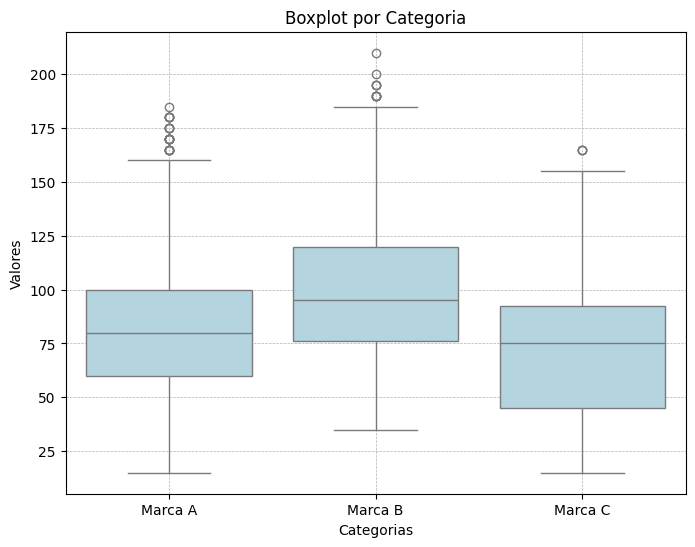

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Categoria', y='Preço', data=vendas, color="lightblue")
plt.title('Boxplot por Categoria')
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

**Distribuição da quantidade de vendas em 2023 de determinada marca da loja**

A marca A é a mais popular em termos de vendas, tendo o dobro de vendas da marca B. Podemos levantar hipóteses da relação entre o preço dos produtos e quantidade de vendas. A Marca B, por ter preços mais elevados (visto no último gráfico), talvez seja menos atrativo aos clientes. Já a Marca C aparece por último no número de vendas, tendo um total de aproximadamente 10% das vendas anuais. Podemos levantar hipóteses do motivo: A Marca A (líder) e a Marca C possuem preços similares, o que pode levar a clientela não as diferenciar pelo preço, mas sim pela preferência entre as duas (popularidade, aparência, qualidade, por exemplo).

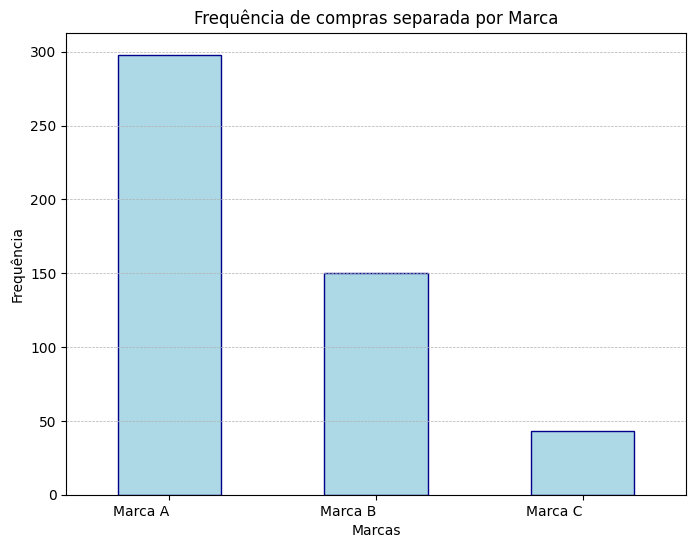

In [20]:
frequencia = vendas['Categoria'].value_counts()
frequencia = frequencia.sort_index()

# Criando o gráfico de barras
frequencia.plot(kind='bar', color='lightblue', edgecolor='darkblue', figsize=(8, 6))

# Personalizando o gráfico
plt.title('Frequência de compras separada por Marca')
plt.xlabel('Marcas')
plt.ylabel('Frequência')
plt.xticks(rotation=0, ha='right')
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')
plt.show()

**Distruição da quantidade de itens comprados pelo cliente**

Com o gráfico, vemos que a maioria dos clientes compram de 1 a 3 produtos, com a quantidade 4 tendo uma expresividade ainda. Quantidades maiores que 4 são menores.

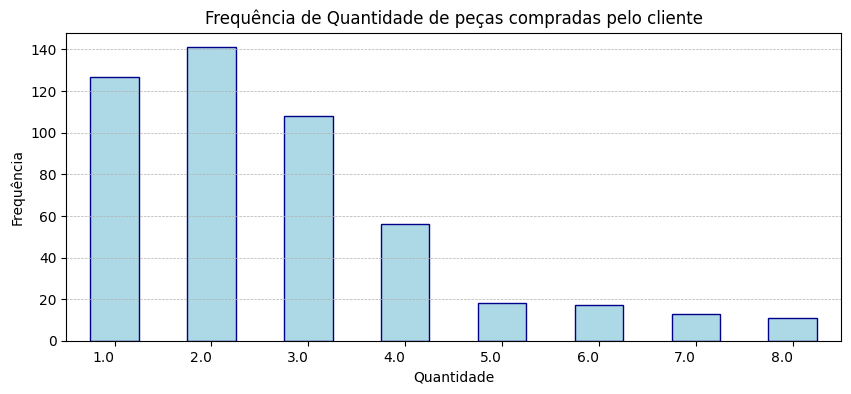

In [19]:
frequencia = vendas['Quantidade'].value_counts()
frequencia = frequencia.sort_index()

# Criando o gráfico de barras
frequencia.plot(kind='bar', color='lightblue', edgecolor='darkblue', figsize=(10, 4))

# Personalizando o gráfico
plt.title('Frequência de Quantidade de peças compradas pelo cliente')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.xticks(rotation=0, ha='right')
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')
plt.show()

# **Análise Temporal**

Separando o lucro bruto por meses

In [29]:
valorPorMes = vendas.groupby(vendas.Data.dt.month)['Valor'].sum()

Nesse gráfico temporal, podemos ver que na maioria dos meses a receita da loja fica entre oito mil reais e quatorze mil reais. Três meses saem dessa margem: Julho, que o valor arrecadado supera os quatroze mil reais; Outubro e Novembro, que a receita fica abaixo dos oito mil reais.

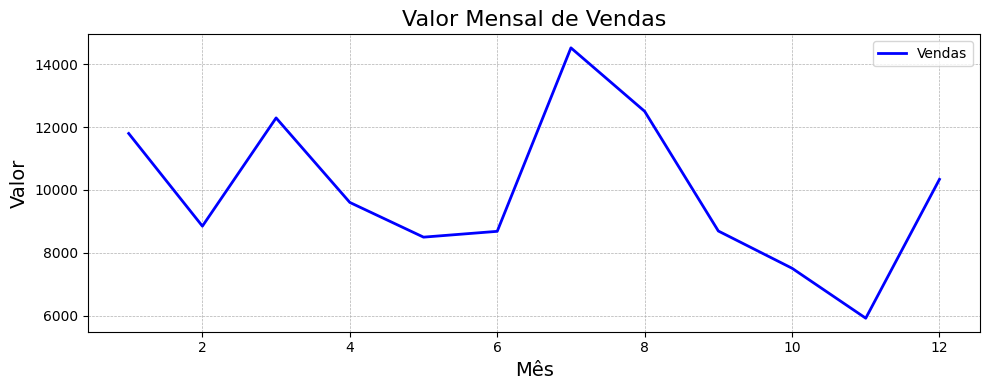

In [30]:
ax = valorPorMes.plot(figsize=(10, 4), color='blue', linestyle='-', linewidth=2)
ax.set_title("Valor Mensal de Vendas", fontsize=16)
ax.set_xlabel("Mês", fontsize=14)
ax.set_ylabel("Valor", fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(["Vendas"])
plt.tight_layout()
plt.show()

Separando o lucro bruto das Marcas por mês

In [31]:
marcaA = (vendas[vendas["Categoria"] == "Marca A"]).groupby(vendas.Data.dt.month)['Valor'].sum()
marcaB = (vendas[vendas["Categoria"] == "Marca B"]).groupby(vendas.Data.dt.month)['Valor'].sum()
marcaC = (vendas[vendas["Categoria"] == "Marca C"]).groupby(vendas.Data.dt.month)['Valor'].sum()

Vemos uma distribuição similar ao que verificamos na analise descritava, com a marca A e B liderando as vendas. Alguns meses vemos que a receita gerada pela Marca B é maior que a Marca A (Junho e Outubro), indicando que, embora a marca B tenha menos produtos vendidos, comparado a Marca A, ela ainda se mostra bem expressiva na receita da loja (por ter produtos mais caros, igual vimos no gráfico box-plot)

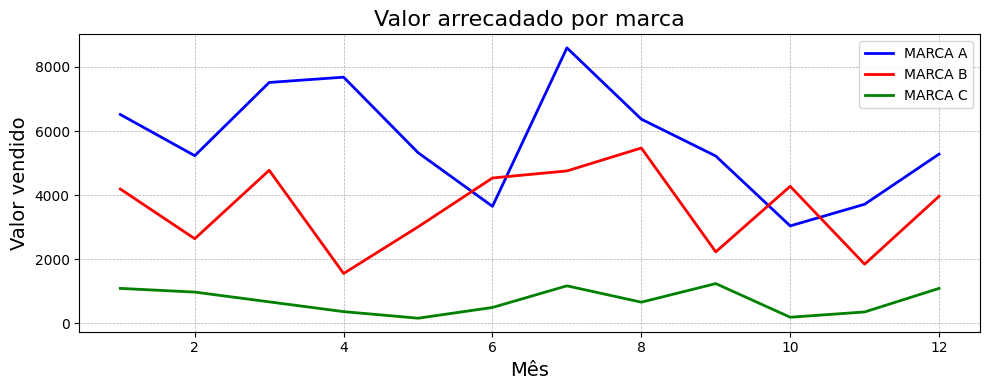

In [33]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(marcaA, color='blue', linestyle='-', linewidth=2, label='MARCA A')
ax.plot(marcaB, color='red', linestyle='-', linewidth=2, label='MARCA B')
ax.plot(marcaC, color='green', linestyle='-', linewidth=2, label='MARCA C')

ax.set_title("Valor arrecadado por marca", fontsize=16)
ax.set_xlabel("Mês", fontsize=14)
ax.set_ylabel("Valor vendido", fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(loc='best')
plt.tight_layout()
plt.show()

Mesma separação que fizemos por Marca, mas agora por produto

In [37]:
camiseta = (vendas[vendas["Produto"] == "Camiseta"]).groupby(vendas.Data.dt.month)['Valor'].sum()
calca = (vendas[vendas["Produto"] == "Calça"]).groupby(vendas.Data.dt.month)['Valor'].sum()
roupaIntima = (vendas[vendas["Produto"] == "Roupa Intíma"]).groupby(vendas.Data.dt.month)['Valor'].sum()
meia = (vendas[vendas["Produto"] == "Meia"]).groupby(vendas.Data.dt.month)['Valor'].sum()
tenis = (vendas[vendas["Produto"] == "Tênis"]).groupby(vendas.Data.dt.month)['Valor'].sum()

Vemos que os produtos que mais geram receita para loja são as camisetas, calças e tênis. Meia e roupas intímas aparecem abaixo de mil reais em todos os meses, provavelmente por terem um preço menor e terem menor procura, do que comparado aos demais. Camisetas e calças possuem um preço mais intermediário, mas possuem uma alta procura. Já os tênis, possuem uma procura menor (tem menos vendas registradas, comparada a camisetas e calças), mas o valor mais alto contruí para o valor expressivo na receita durante os meses.

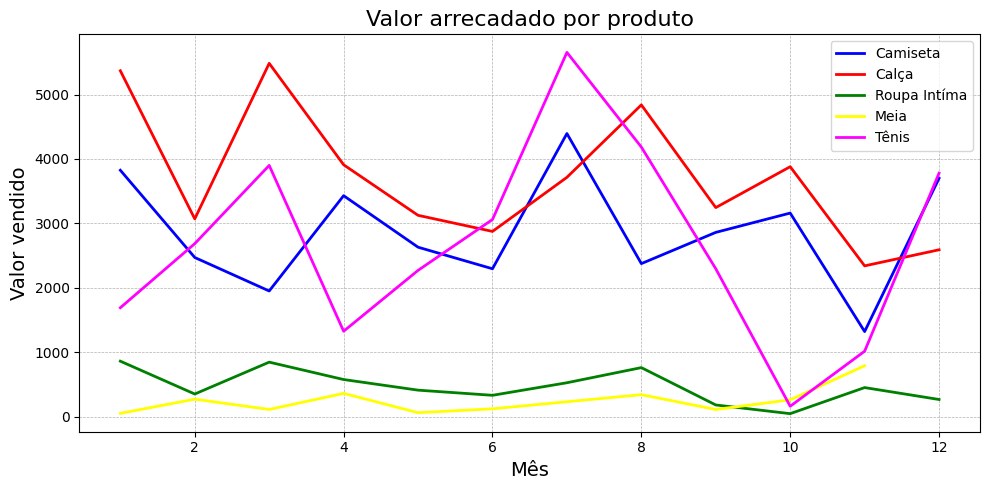

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(camiseta, color='blue', linestyle='-', linewidth=2, label='Camiseta')
ax.plot(calca, color='red', linestyle='-', linewidth=2, label='Calça')
ax.plot(roupaIntima, color='green', linestyle='-', linewidth=2, label='Roupa Intíma')
ax.plot(meia, color='yellow', linestyle='-', linewidth=2, label='Meia')
ax.plot(tenis, color='magenta', linestyle='-', linewidth=2, label='Tênis')

ax.set_title("Valor arrecadado por produto", fontsize=16)
ax.set_xlabel("Mês", fontsize=14)
ax.set_ylabel("Valor vendido", fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(loc='best')
plt.tight_layout()
plt.show()

Neste gráfico, plotamos juntos os "Carros Chefes" da loja (Camiseta, Calças e Tênis) e a receita total, para tentar entender o porque Julho, Outubro e Novembro estão fora do intervalo de oito a quatorze mil. Olhando para julho, vemos que os três produtos carros chefes tiveram um aumento na receita, comparada ao mês anterior, tendo os três produtos uma arrecadação alta no mês em questão, o que ocasionou a receita alta da loja no mês. Já em Outubro e Novembro, temos as arrecadações de Camisetas e Calça em preços médios, mas a arrecadação de tênis se mostra muito abaixo do esperado, comparando com outros meses, uma vez que o valor arrecadado estava em queda desde julho (mês de maior pico). Esse baixo valor arrecadado pela venda de tênis acarretou em uma baixa receita da loja nos meses de outubro e novembro.

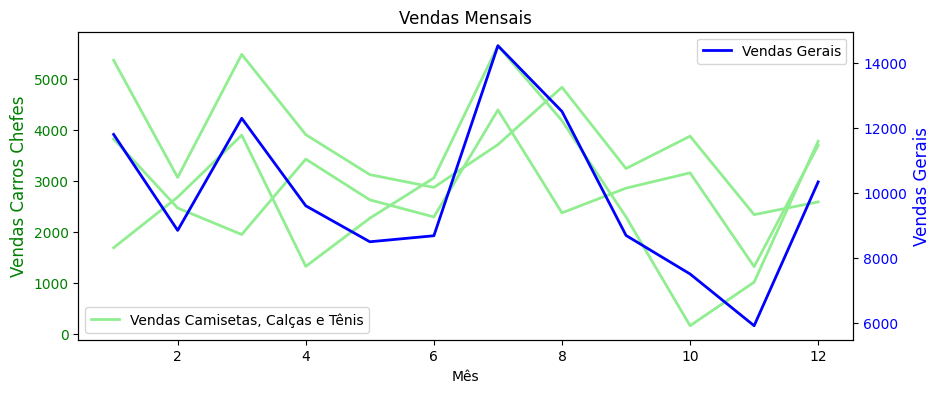

In [69]:
# Criando o gráfico
fig, ax1 = plt.subplots()

ax1.plot(camiseta, color='lightgreen', linestyle='-', linewidth=2, label='Camiseta')
ax1.plot(calca, color='lightgreen', linestyle='-', linewidth=2, label='Calça')
ax1.plot(tenis, color='lightgreen', linestyle='-', linewidth=2, label='Tênis')
ax1.set_xlabel('Mês')
ax1.set_ylabel('Vendas Carros Chefes', color='green', fontsize=12)
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(["Vendas Camisetas, Calças e Tênis"], loc='lower left')


ax2 = ax1.twinx()
ax2 = valorPorMes.plot(figsize=(10, 4), color='blue', linestyle='-', linewidth=2)
ax2.set_title("Valor Mensal de Vendas", fontsize=16)
ax2.set_xlabel("Mês", fontsize=14)
ax2.set_ylabel("Vendas Gerais", color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(["Vendas Gerais"], loc='upper right')

# Título e layout
plt.title('Vendas Mensais')
plt.show()
